In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data_path = 'Training.csv'
data = pd.read_csv(data_path, index_col=-1)
# data.drop(data.columns.str.contains('Unnamed', case=False), axis = 1, inplace = True)
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
NaN,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
NaN,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
NaN,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
NaN,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [3]:
disease_count = data['prognosis'].value_counts()
temp_df = pd.DataFrame({
    'Disease': disease_count.index,
    'Counts': disease_count.values
})
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


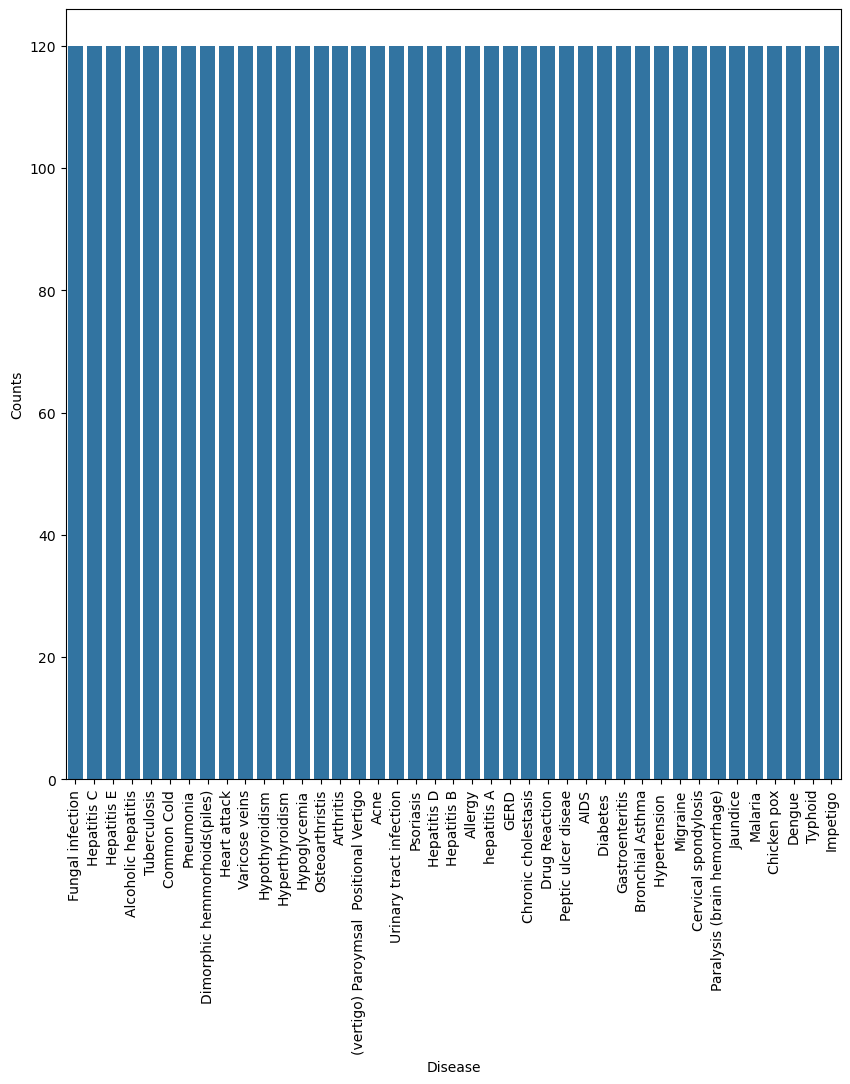

In [4]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Disease', y = "Counts", data = temp_df)
plt.xticks(rotation = 90)
plt.show()

In [5]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [6]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [7]:
svc_score = cross_val_score(SVC(), x, y, cv=10, n_jobs=-1)
print(f"""
Model: SVC
Scores: {svc_score}
Mean: {svc_score.mean()}
""")


Model: SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0



In [8]:
svc_score = cross_val_score(GaussianNB(), x, y, cv=10, n_jobs=-1)
print(f"""
Model: SVC
Scores: {svc_score}
Mean: {svc_score.mean()}
""")


Model: SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0



In [9]:
svc_score = cross_val_score(RandomForestClassifier(), x, y, cv=10, n_jobs=-1)
print(f"""
Model: SVC
Scores: {svc_score}
Mean: {svc_score.mean()}
""")


Model: SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean: 1.0



Accuracy on training data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


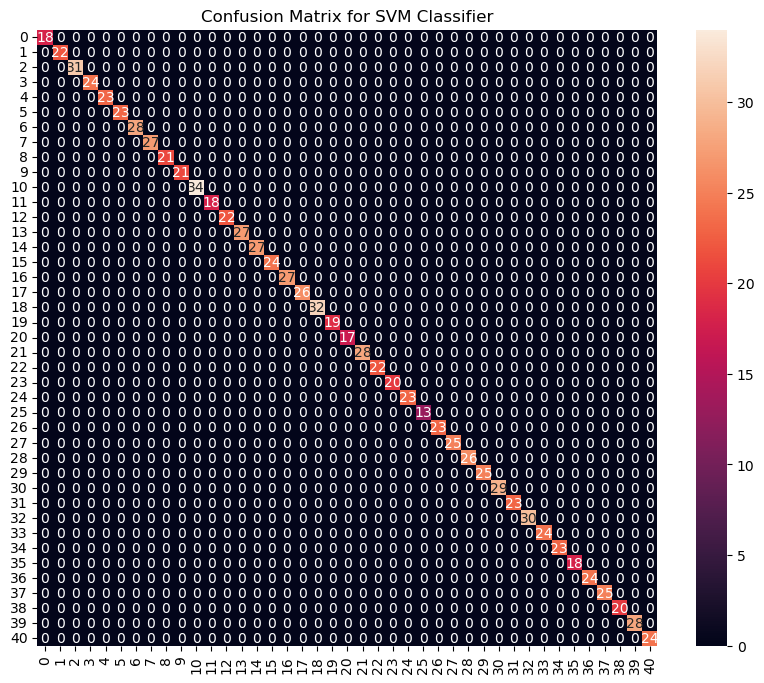

In [10]:
svm_model = SVC()
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print(f"Accuracy on training data by SVM Classifier: {accuracy_score(y_train, svm_model.predict(x_train)) * 100}")

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test, y_pred) * 100}")

con_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, annot = True)
plt.title("Confusion Matrix for SVM Classifier")
plt.show()

Accuracy on training data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


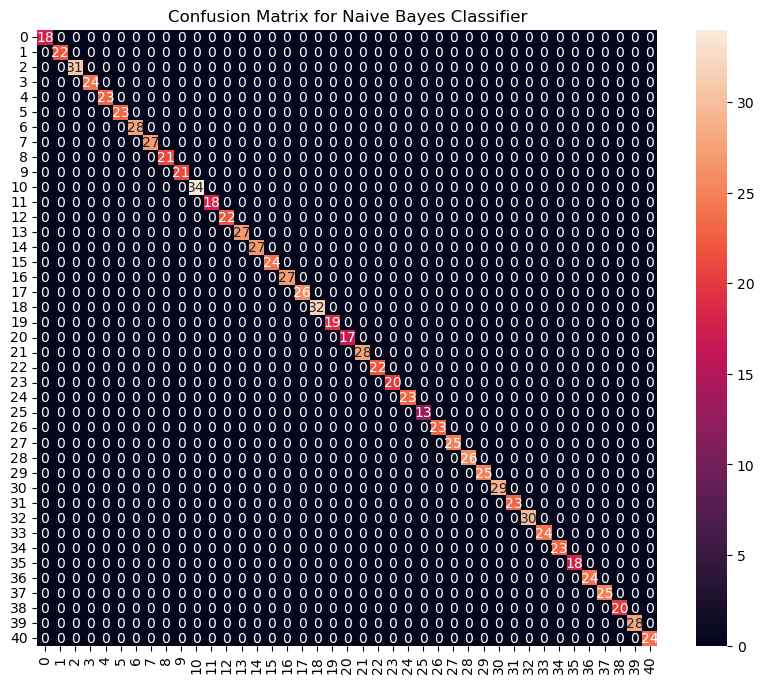

In [11]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(x_test)

print(f"Accuracy on training data by Naive Bayes Classifier: {accuracy_score(y_train, nb_model.predict(x_train)) * 100}")

print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, y_pred) * 100}")

con_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, annot = True)
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

Accuracy on training data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


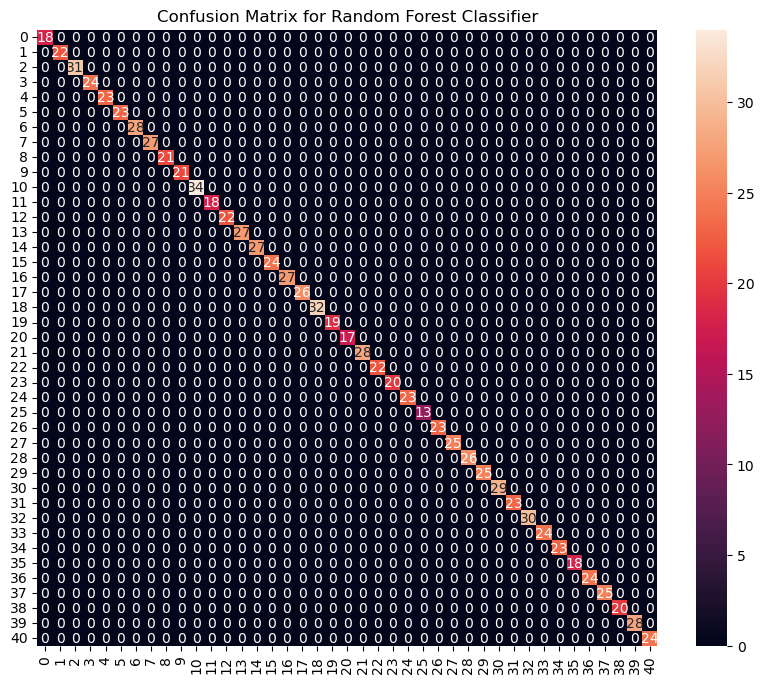

In [12]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)

print(f"Accuracy on training data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(x_train)) * 100}")

print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, y_pred) * 100}")

con_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(con_mat, annot = True)
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

Accuracy on test data by SVM Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 97.61904761904762
Accuracy on test data by Ensemble Classifier: 100.0


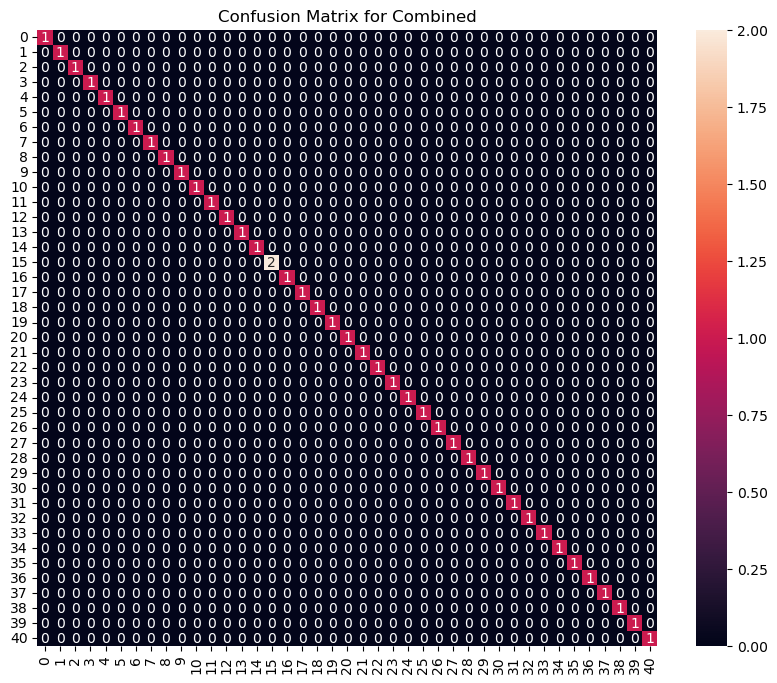

In [13]:
from scipy import stats

final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier()
final_svm_model.fit(x, y)
final_nb_model.fit(x, y)
final_rf_model.fit(x, y)

test_data = pd.read_csv('Testing.csv').dropna(axis = 1)

test_x = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:, -1])

svm_pred = final_svm_model.predict(test_x)
nb_pred = final_nb_model.predict(test_x)
rf_pred = final_rf_model.predict(test_x)

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(test_y, svm_pred) * 100}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(test_y, nb_pred) * 100}")
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(test_y, rf_pred) * 100}")

final_pred = [stats.mode([i, j, k])[0] for i, j, k in zip(svm_pred, nb_pred, rf_pred)]

print(f"Accuracy on test data by Ensemble Classifier: {accuracy_score(test_y, final_pred) * 100}")

cf_matrix = confusion_matrix(test_y, final_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined")
plt.show()

In [14]:
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
NaN,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
NaN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NaN,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [15]:
symp = x.columns.values

symp_index = {}
for index, value in enumerate(symp):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symp_index[symptom] = index

data_dict = {
    "Symptom Index": symp_index,
    "Prediction Classes": encoder.classes_
}

def pred_disease(symptoms):
    import statistics

    symptoms = symptoms.split(",")

    input_data = [0] * len(data_dict["Symptom Index"])
    for symptom in symptoms:
        index = data_dict["Symptom Index"][symptom]
        input_data[index] = 1

    input_data = np.array(input_data).reshape(1, -1)

    svm_preds = data_dict["Prediction Classes"][final_svm_model.predict(input_data)[0]]
    nb_preds = data_dict["Prediction Classes"][final_nb_model.predict(input_data)[0]]
    rf_preds = data_dict["Prediction Classes"][final_rf_model.predict(input_data)[0]]

    final_preds = statistics.mode([svm_preds, nb_preds, rf_preds])
    predictions = {
        "SVM Prediction": svm_preds,
        "Naive Bayes Prediction": nb_preds,
        "Random Forest Prediction": rf_preds,
        "Final Prediction": final_preds}
    
    return predictions

print(pred_disease("Nodal Skin Eruptions,Continuous Sneezing"))

{'SVM Prediction': 'Allergy', 'Naive Bayes Prediction': 'Allergy', 'Random Forest Prediction': 'Fungal infection', 'Final Prediction': 'Allergy'}


d:\Installed_Software\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Installed_Software\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
d:\Installed_Software\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
